In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  OK
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time OK

In [4]:
#First point 

tau = 3.052*60

def f(x):
    return 1.-2**(-x/tau)

#initial atoms in the sample
atoms = 1000 
#time range in seconds 
time = 2000 

#initial atoms for each element
Pb_in = np.zeros(atoms) 
Tl_in = np.ones(atoms) 

#at time zero no atom has decayed yet
Pb_time = np.empty(time)
Tl_time = np.empty(time)

#counting the decayed atoms as time passes
Pb_time[0] = np.sum(Pb_in)
Tl_time[0] = np.sum(Tl_in)


for i in range (1,time):
    for j in range (atoms):
        #f(1) because I have time steps of 1 second each
        if (np.random.uniform()<= f(1)):
            Tl_in[j]=0
            Pb_in[j]=1
    Tl_time[i]=np.sum(Tl_in)
    Pb_time[i]=np.sum(Pb_in)



In [6]:
#Second point
tau = 3.052*60
  
def g(x):
    return np.exp2(-k/tau)*(np.log(2)/tau)
    
#creating the random numbers
k = np.linspace(0,1000,1000)
y = g(k)
z = 1 - g(k)


Text(0.5, 1.0, 'Probability of Pb decay')

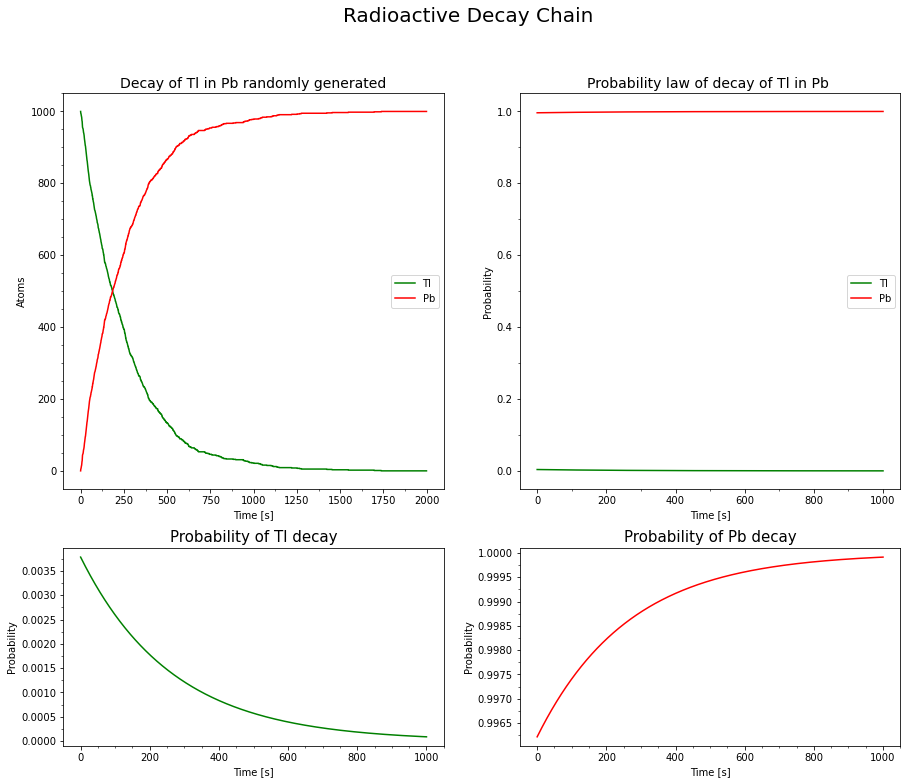

In [7]:
#performing all the plots 
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

fig = plt.figure(figsize=(15,12))
plt.suptitle("Radioactive Decay Chain", size = 20)
gs = GridSpec(2, 2, height_ratios=[2, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

ax1.plot(Tl_time, color = 'green', label = 'Tl')
ax1.plot(Pb_time, color = 'red', label = 'Pb')
ax1.legend()
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Atoms')
ax1.set_title('Decay of Tl in Pb randomly generated', fontsize = 14)
ax1.yaxis.set_minor_locator(AutoMinorLocator(4))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))


ax2.plot(k,y, color = 'green',label = 'Tl')
ax2.plot(k,z, color = 'red',label = 'Pb')
ax2.legend()
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Probability')
ax2.set_title('Probability law of decay of Tl in Pb ', fontsize = 14)
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))

""" Because of the form of the probability distribution used, the overall graph of the probability low decay is not very meaningful.
In order to understand better how it behaves in both cases, I've realized, below the two general graphs, also a plot of the single 
probability: one for Tl decay and one for Pb decay """

ax3.plot(k,y,color = 'green')
ax3.set_ylabel('Probability')
ax3.set_xlabel('Time [s]')
ax3.xaxis.set_minor_locator(AutoMinorLocator(4))
ax3.yaxis.set_minor_locator(AutoMinorLocator(2))
ax3.set_title("Probability of Tl decay", size=15)

ax4.plot(k,z, color = 'red')
ax4.set_ylabel('Probability')
ax4.set_xlabel('Time [s]')
ax4.xaxis.set_minor_locator(AutoMinorLocator(4))
ax4.yaxis.set_minor_locator(AutoMinorLocator(2))
ax4.set_title("Probability of Pb decay", size=15)



2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

 Array of integrals calculated with hit/miss method: [1.34438 1.34868 1.3431  1.34764 1.35076 1.35094 1.34476 1.3454  1.35252
 1.34736]
Mean value of the integrals 1.34755
Standard deviation of the integrals 0.003

Integral calculated with mean value method: 1.3497
Error of the mean value method 0.00316


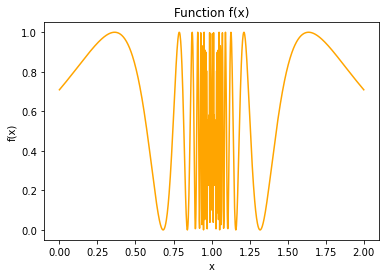

In [145]:
#Defining and plotting the function
def f(x):
    return (np.sin(1. / (1.-x)))**2

x=np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x), '-', color = 'orange')
plt.title("Function f(x)")
plt.ylabel("f(x)")
plt.xlabel('x')


#Integration whith hit/miss method
N = 100000
count = 0
n = 10
err =[]

for j in range(n):
    for i in range(N):
        x_1 = 2 * np.random.random() 
        y = np.random.random()     
        if y < f(x_1): count += 1
    err.append(2 * count / N)
    count = 0 

arr = np.array(err)
m = np.mean(arr)
s = np.std(arr)
print(" Array of integrals calculated with hit/miss method:", arr)
print("Mean value of the integrals", np.round(m,5))
print("Standard deviation of the integrals", np.round(s,5))



#Integration with mean value method
x_2 = 2 * np.random.random(N)
I_2 = 2 / N * np.sum(f(x_2))
err_2 = 1/sqrt(N)
# estimate and relative error
print("\nIntegral calculated with mean value method:", np.round(I_2,5))
print("Error of the mean value method", np.round(err_2,5))

""" The two errors have the same order of magnitude"""



3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function: OK
 
$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere. OK

In [148]:
#Circle of unit radius w

#I use hit/miss method to compute the integral
N=1000000
count=0
for i in range(N): 
    #radius is 1 i.e both of the variables go from -1 to 1
    x=2*np.random.random()-1 
    y=2*np.random.random()-1 
    if x**2+y**2<=1:
        count+=1

A=(2**2) #area of the box given by xy-domain 
I_circle=A*count/N
print('Resulting integral:',np.round(I_circle,6))


Resulting integral: 3.143032


In [151]:
#Sphere of 10 dimensions

N=10000
count=0
for i in range(N):
    # radius is 1 i.e. the variable goes from -1 to 1 for each dimension
    x=2*np.random.rand(10)-1 
    r=(x**2).sum()
    if r<=1:
        count+=1
A=(2**10) #area of the box given by 10D-domain
I_sphere=A*count/N
print('Resulting integral with hit/miss method:',np.round(I_sphere,6))


Resulting integral with hit/miss method: 3.584


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [153]:
#function of the integral
def f(x):
     return x**(-1/2)/(np.exp(x)+1)

#weight function
def w(x):
    return 1/x**0.5

n = 10000000

x=np.random.random(n)
I_3 = 2 / n * np.sum(f(x) / w(x))
print("The integral with the importance sampling method is:", I_3)
print('The error is:',np.abs(np.round(I_3-0.84,6)))

The integral with the importance sampling method is: 0.7596821450802796
The error is: 0.080318
